<H2>Model Evaluation and Refinement</H2>

<h2>Table of Contents</h2>
<ul>
    <li><a href="https://#ref1">Model Evaluation </a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ul>

In [1]:
#for lab in the browser, install the libraries using pipelite
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [2]:
#for local run using Anaconda, load the correct library & the versions by uncommenting the following
#install specific version of libraries used in lab
#! mamba install pandas ==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [44]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [45]:
#download the dataset into your browser

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [46]:
#you will need to download the dataset; 
await download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.\
cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/\
labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

In [6]:
#to download the dataset (for local machine)
#await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.\
#cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/\
#labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

In [47]:
#Load the data & store it in dataframe df
df = pd.read_csv("module_5_auto.csv", header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [48]:
#use only numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [49]:
#removed columns 'Unnamed:0.1' & 'Unnamed:0' - no value to the models

df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

#view updated dataframe
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [50]:
#import libraries for plotting

from ipywidgets import interact, interactive, fixed, interact_manual

<H3>Functions for Plotting</H3>

In [51]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [53]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    #lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<H3>Part 1: Training and Testing</H3>

In [55]:
#place the tarhet data price in a separate dataframe y_data

y_data = df['price']

In [56]:
#drop data in dataframe x_data

x_data=df.drop('price',axis=1)

In [57]:
#randomly split data into training & testing data
#function `train_test_split
#where test size is 10%

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split\
(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


<b>Requirement: </b>
<p>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</p>

In [59]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split\
(x_data, y_data,  test_size=0.40, random_state=0)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 21
number of training samples: 180


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
#create a Linear Regression object
lre=LinearRegression()

In [62]:
#fit the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [63]:
#calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [64]:
#R^2 is much smaller using the test data compared to the training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

<b>Requirement: </b>
<p>Find the R^2 on the test data using 40% of the dataset for testing</p>

In [65]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, \
test_size=0.40, random_state=0)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

<H3>Cross-Validation Score</H3>

In [66]:
#import `model_selection` from the module `cross_val_score.`
from sklearn.model_selection import cross_val_score

In [68]:
#input the object, the feature ("horsepower") and the target data(y_data).
#the parameter 'cv' determines the number of folds. 

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [69]:
#R^2 is the default scoring.
#each element in the array has the average R^2 value for the fold

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [70]:
#calculate the avg and std deviation of our estimate

print("The mean of the folds are", Rcross.mean(),\
      "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.29118394447560253


In [27]:
#use negative square error as a score by setting the parameter `scoring` metric to `neg_mean_squared_error`

-1 * cross_val_score(lre,x_data[['horsepower']], \
    y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

<b>Requirement: </b>
<p>Calculate the average R^2 using 2 folds, then find the average R^2 for the second fold utilizing the "horsepower" feature</p>

In [71]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print("The mean of the folds are", Rcross.mean())

The mean of the folds are 0.5166761697127429


In [73]:
#predict the output
#`cross_val_predict` splits up the data into specified number of folds. 

#import the function
from sklearn.model_selection import cross_val_predict

In [74]:
#input object, the feature "horsepower", and the target data 'y_data'

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<H2> Part 2: Overfitting, Underfitting and Model Selection</H2>

Test data (out of sample data) is much better measure of how well model performs in the real world. 

<H4>Overfitting</H4>
Differences are more apparent in Multiple Linear Regression and Polynomial Regression. 

In [75]:
#create Multiple Linear Regression objects
#train the model using 'horsepower, 'curb-weight', 'engine-size', 'highway-mpg' 

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [76]:
#prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [77]:
#prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

<H4>Perform model evaluation using training & testing data separately.</H4>

In [78]:
#import library for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

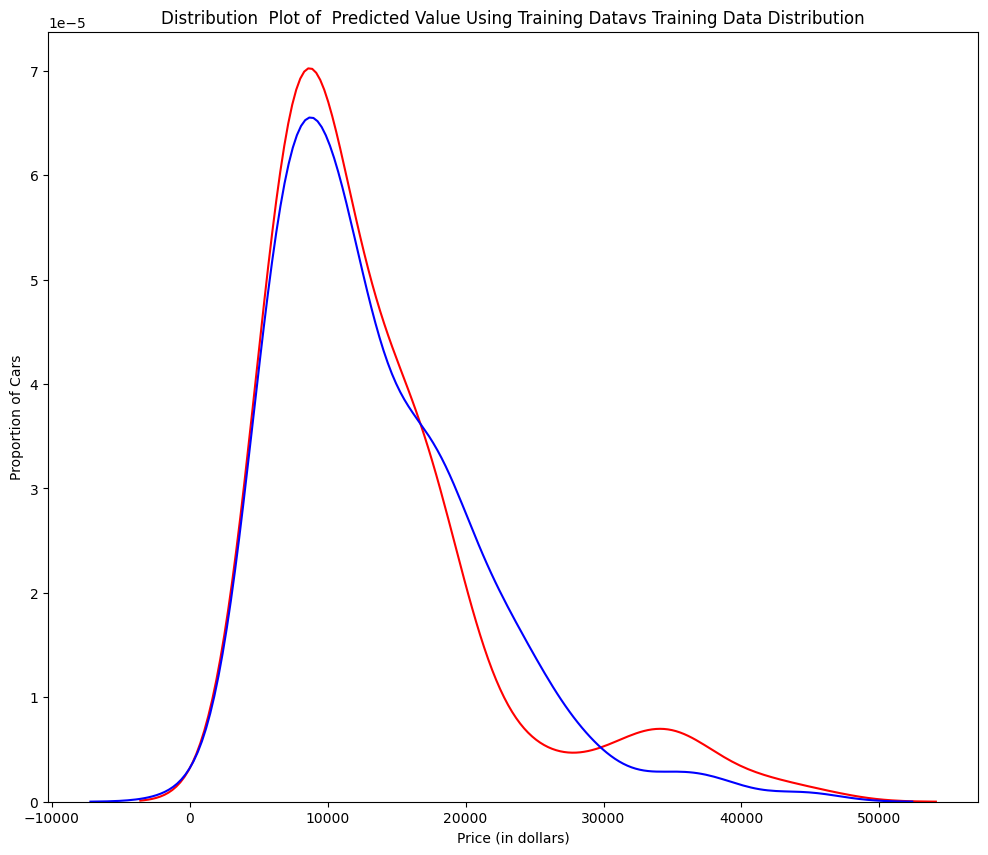

In [79]:
#examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data\
vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", \
"Predicted Values (Train)", Title)

<b>Figure1: </b> Plot of the predicted values using the trainig data compared to the actual values of the training data

Conclusion: Model is learning well from the training set.  
However there could be different situation when the model encounters new data from the testing dataset. 

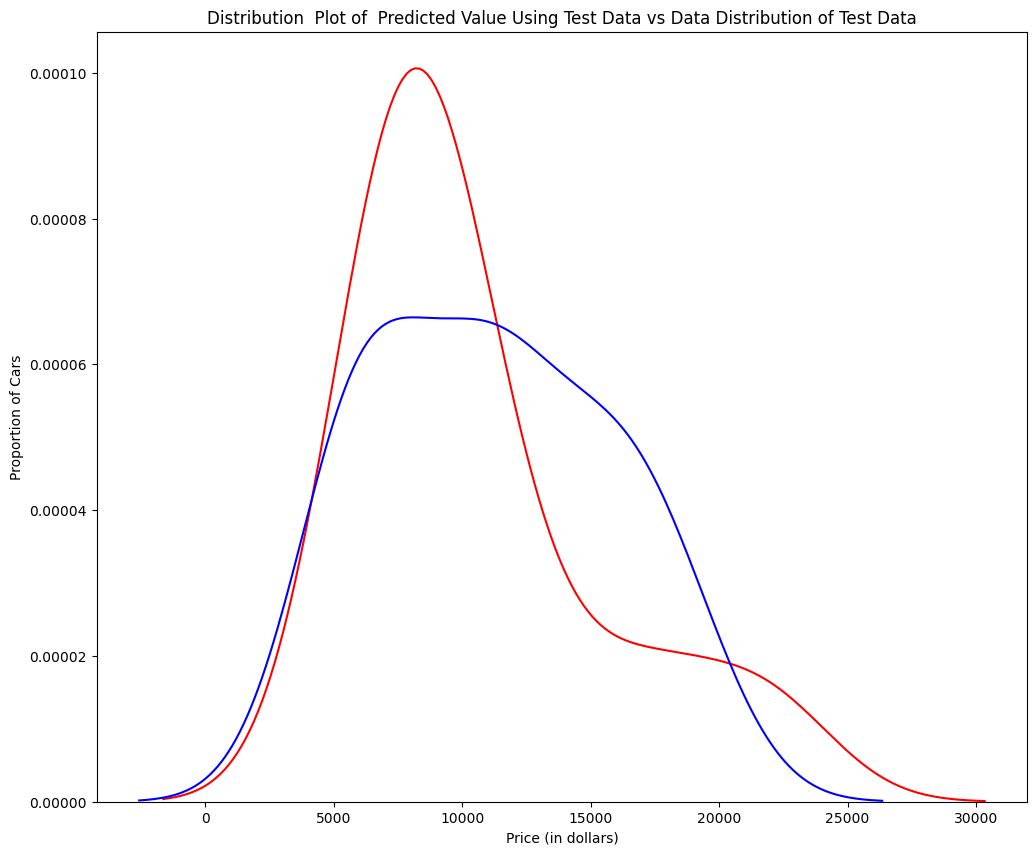

In [80]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<b>Figure 2:</b> Plot of predicted value using the test data compared to the actual values of the test data 

<b>Figure 1 vs Figure 2 Comparation</b>: 
<p>Distribution of the test data in Figure 1 is much better at fitting data.</p> 
<p>Figure 2 apparently has the difference in the range of 5,000 to 15,000. This is where the shape of the distribution is extremely different.</p> 

In [81]:
#to check if polynomial regression also exibits a drop in the prediction accuracy

from sklearn.preprocessing import PolynomialFeatures

<H4>Overfitting</H4>

This situation occurs when the model fits the modelling noise, but not the underlying process. 

<b>Task:</b> Create a degree 5 polynomial model

In [85]:
#use 55% of the data for training, 45% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [86]:
#perform a degree 5 polynomial tranformation on the feature `horsepower`

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [87]:
#create a Linear Regression model `poly` and train it.

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [88]:
#check the output of the model with method `predict`. 
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63832421,  7307.97117434, 12213.7782297 , 18893.28386921,
       19995.98994044])

In [89]:
#take the first 5 predicted values and compare them to actual values

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63832421  7307.97117434 12213.7782297  18893.28386921]
True values: [ 6295. 10698. 13860. 13499.]


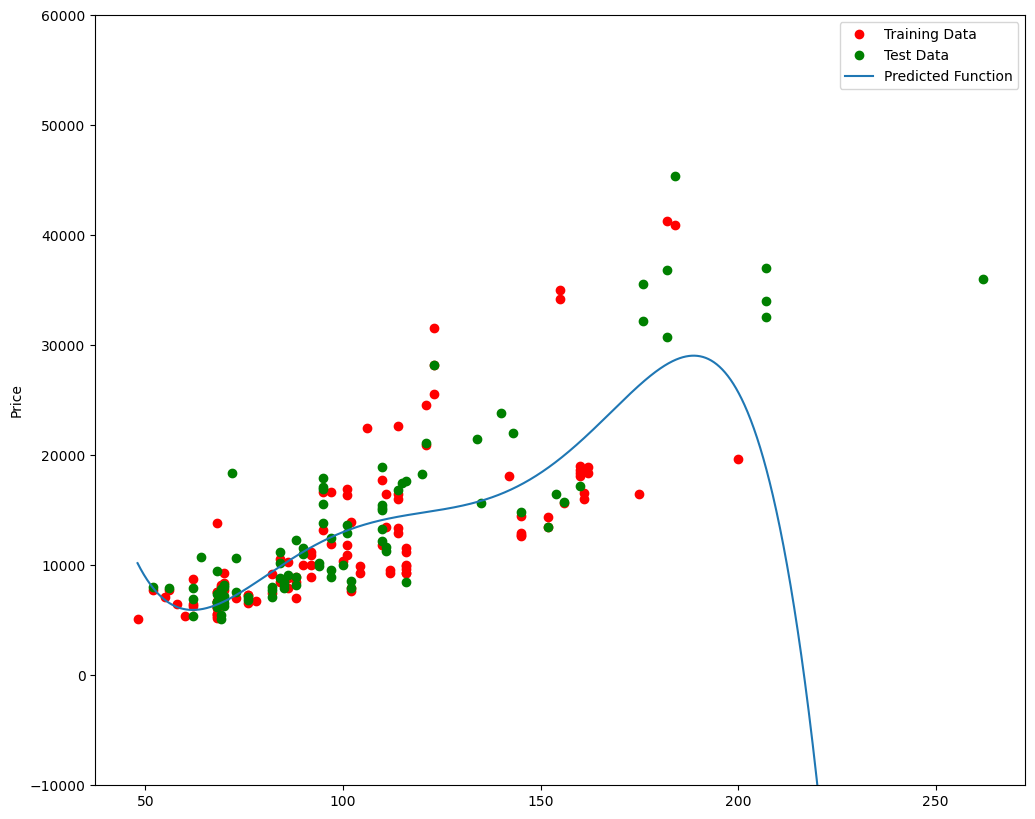

In [90]:
#use the function `PollyPlot` to diplay the training data, testing data and the predicted function. 
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

<b>Figure 3:</b> A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction. The function begins diverge at around 200 horsepower. 

In [91]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716901663193

In [92]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871307705799722

The lower the R^2 the worse is the model. 
In our situation the R^2 fri the test data is -29.87, while the R^2 for the training data is 0.5567.
A negative R^2 is a sign of overfitting. 

Text(3, 0.75, 'Maximum R^2')

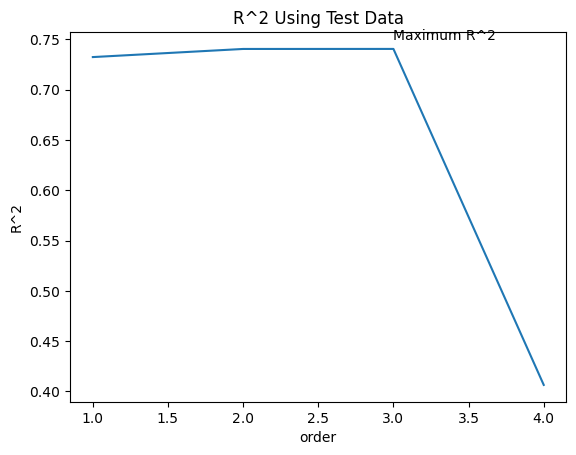

In [95]:
#check how the R^2 changes on the test data for different order polynomials

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order: 
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

R^2 is increasing gradually until a degree=3 polynomial is used. 
Then R^2 suddenly decreases at a degree=4 polynomial. 

In [97]:
def f(order, test_data):
    x_train, x_test, y_trai, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

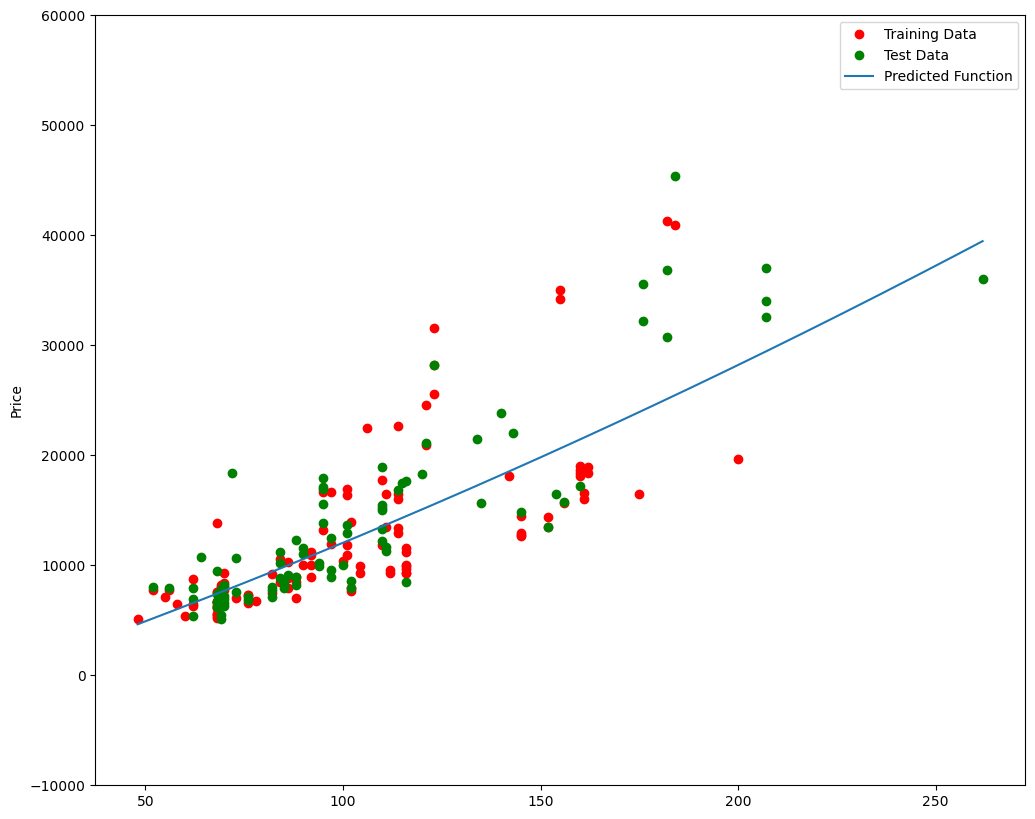

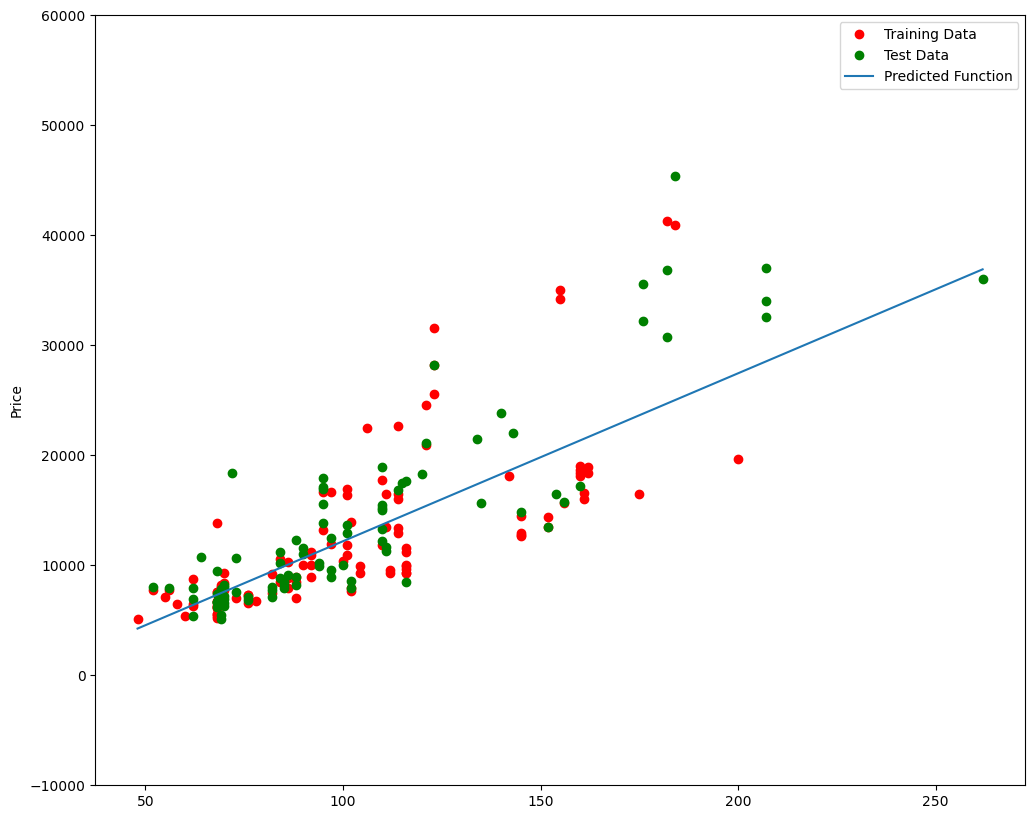

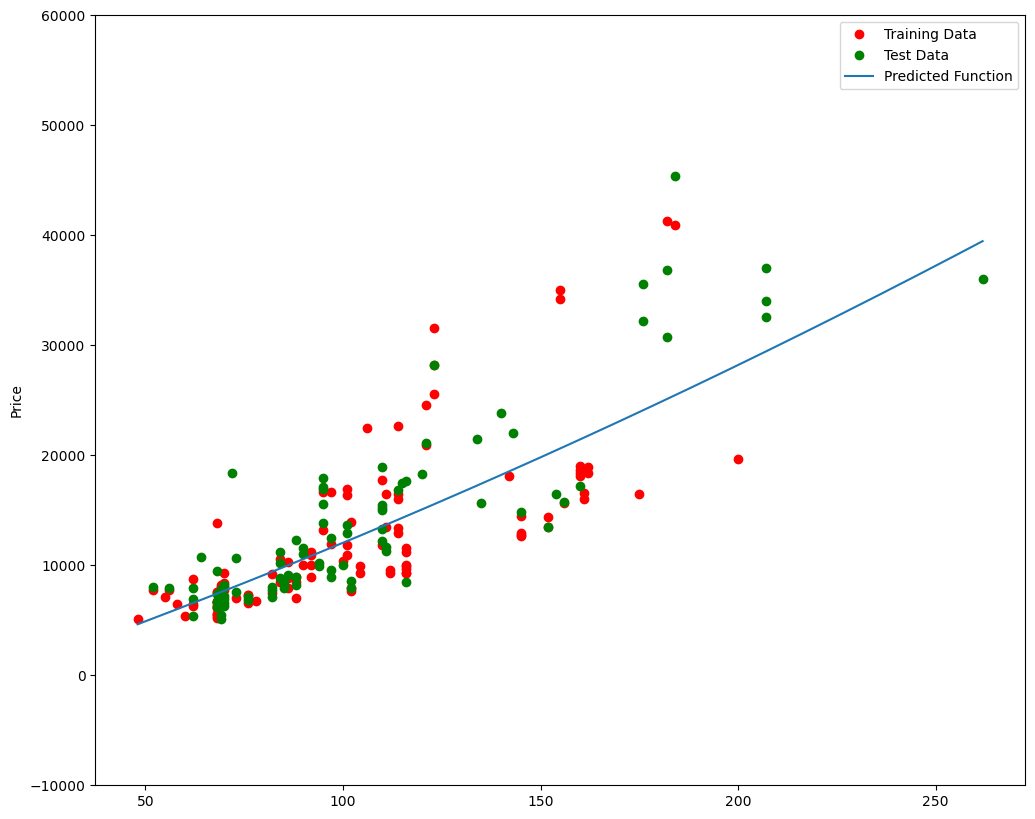

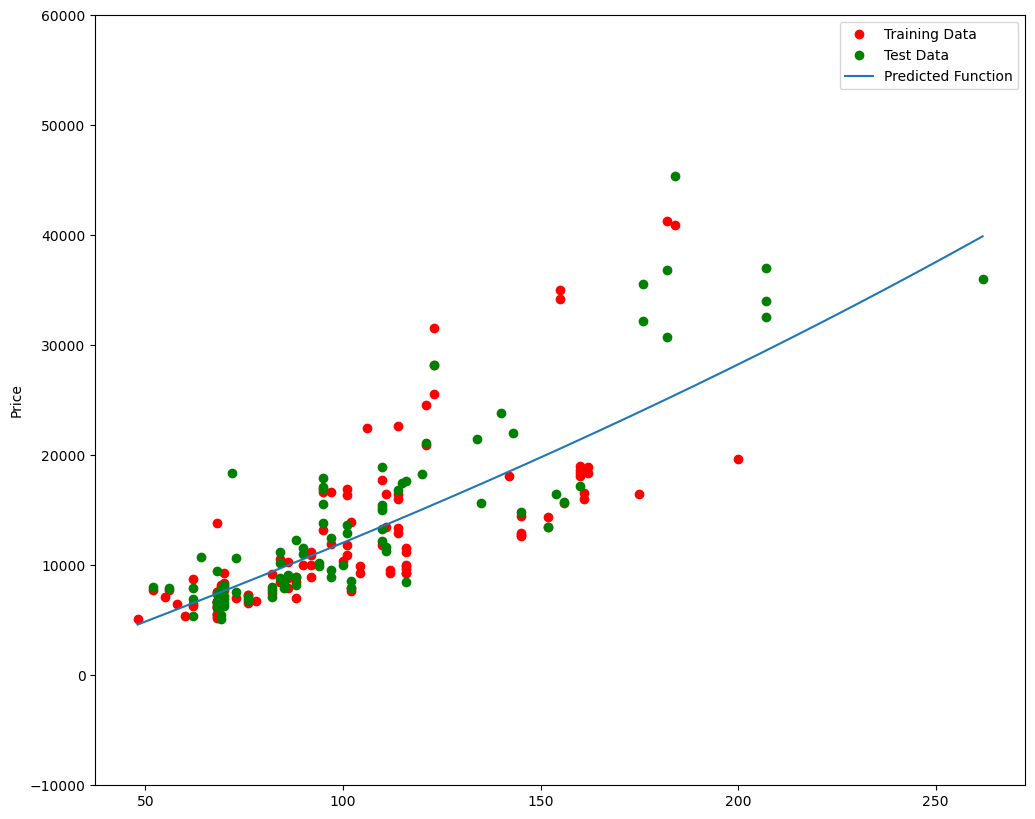

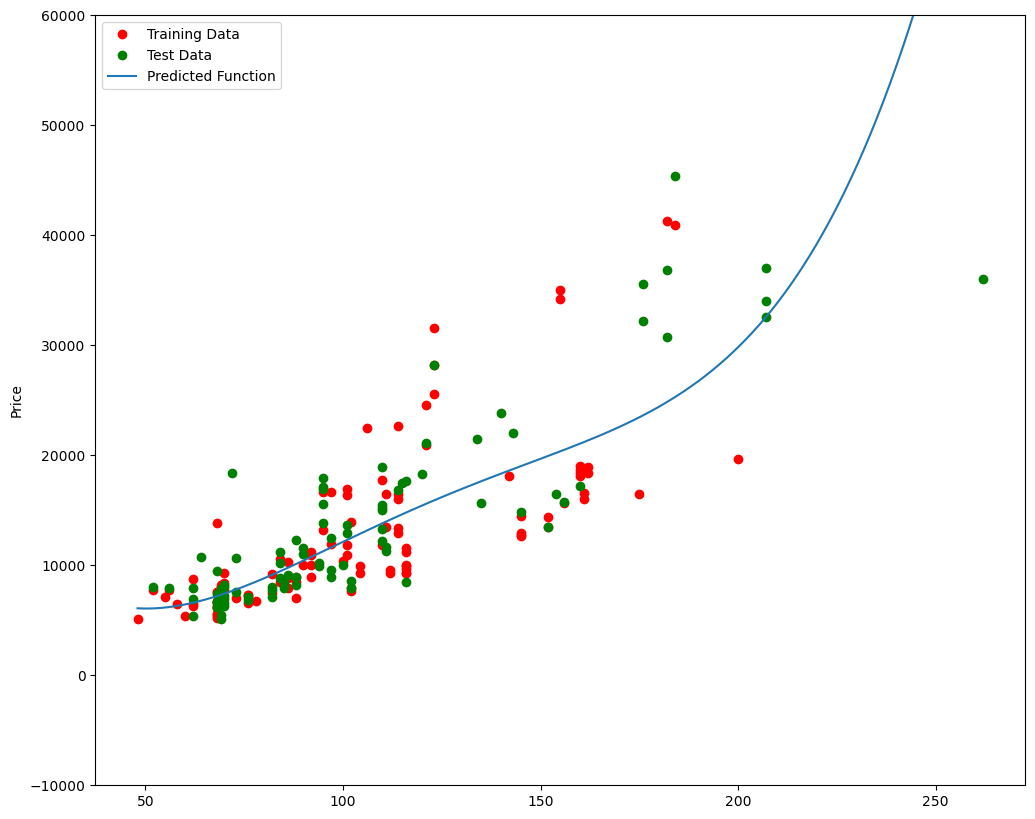

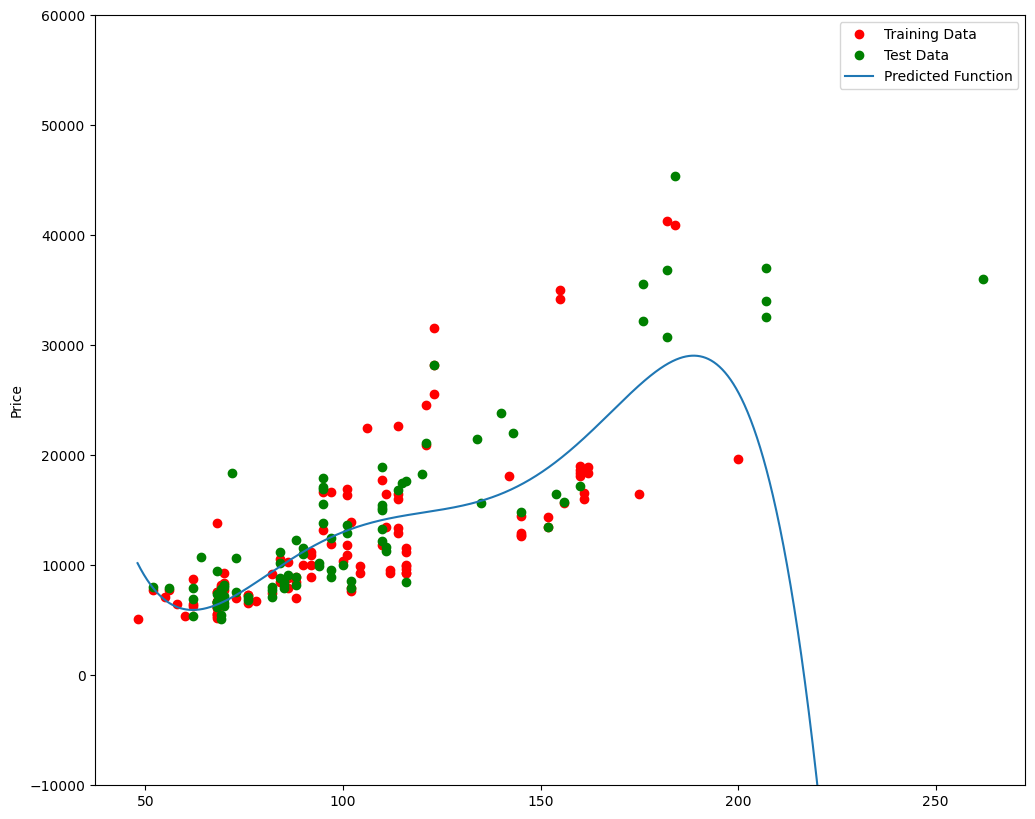

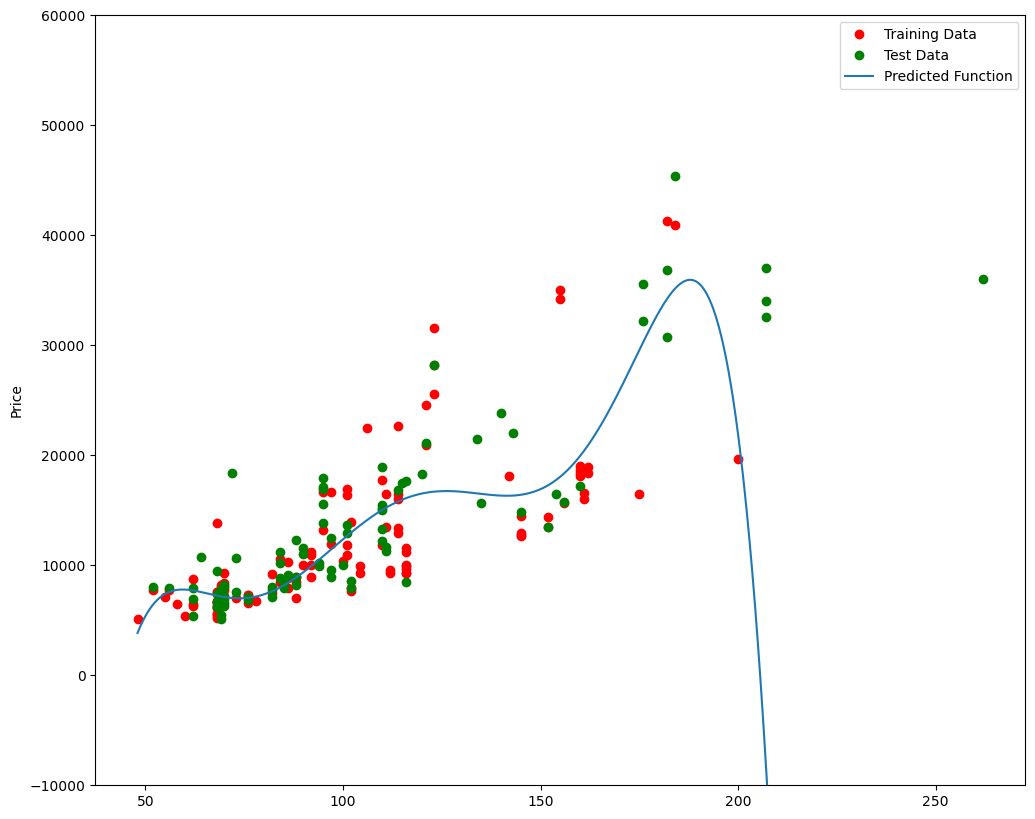

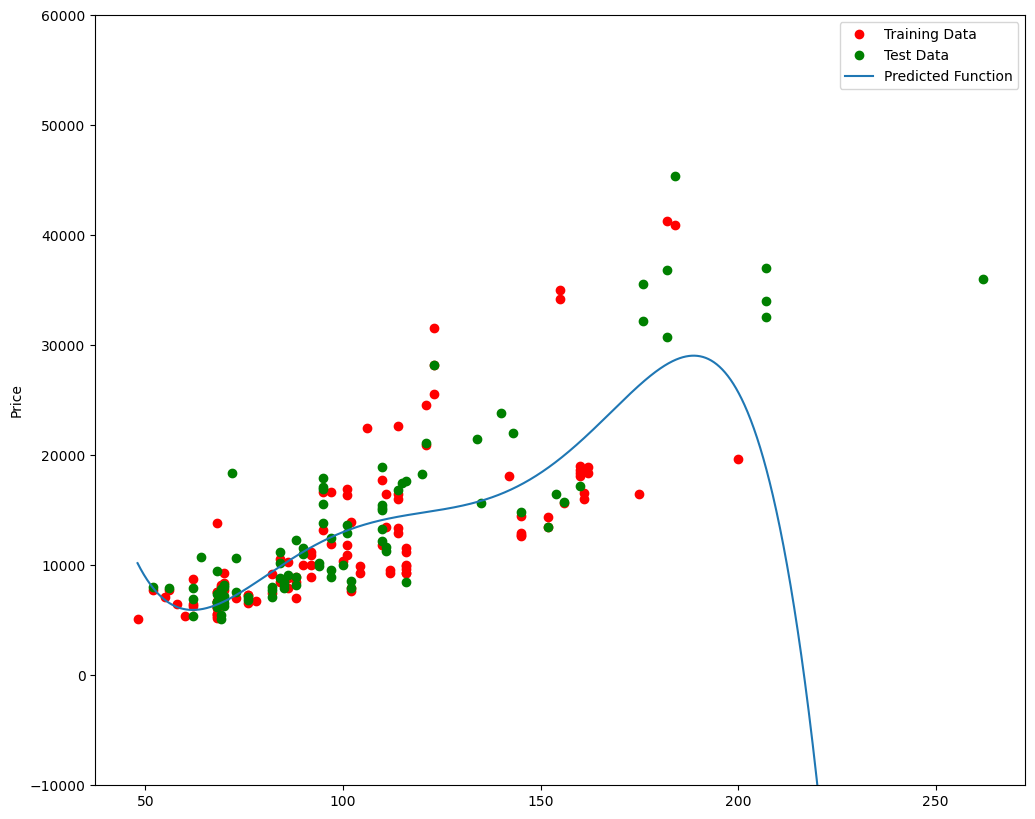

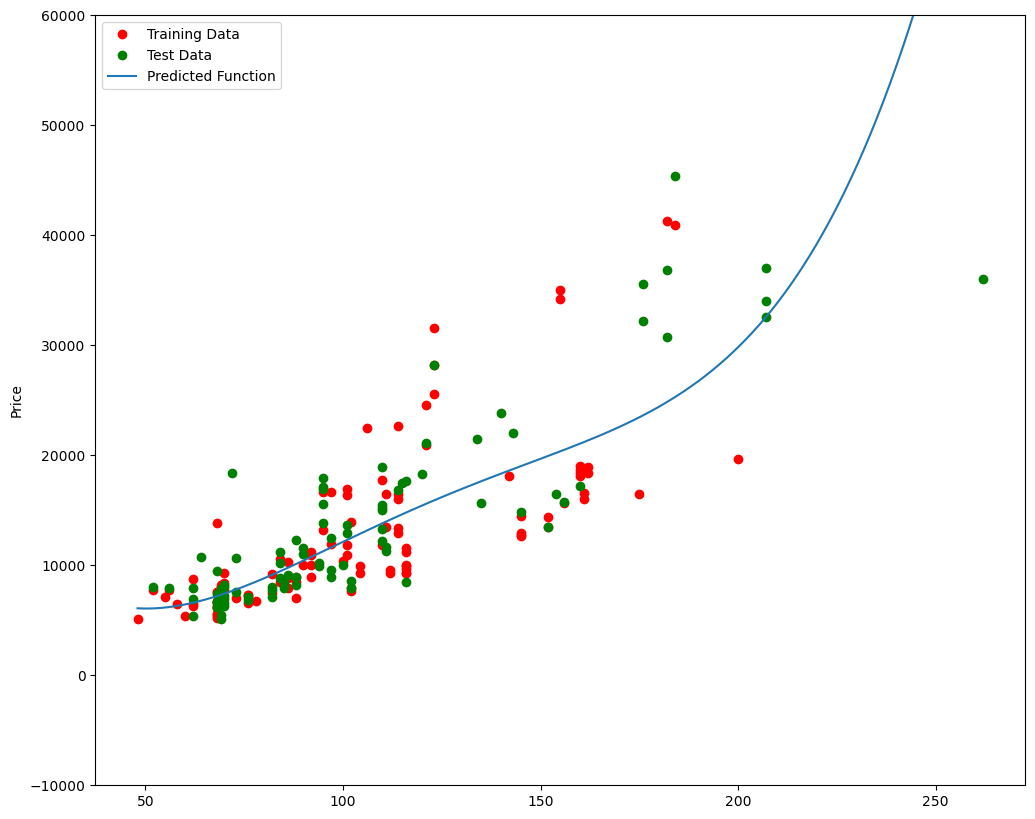

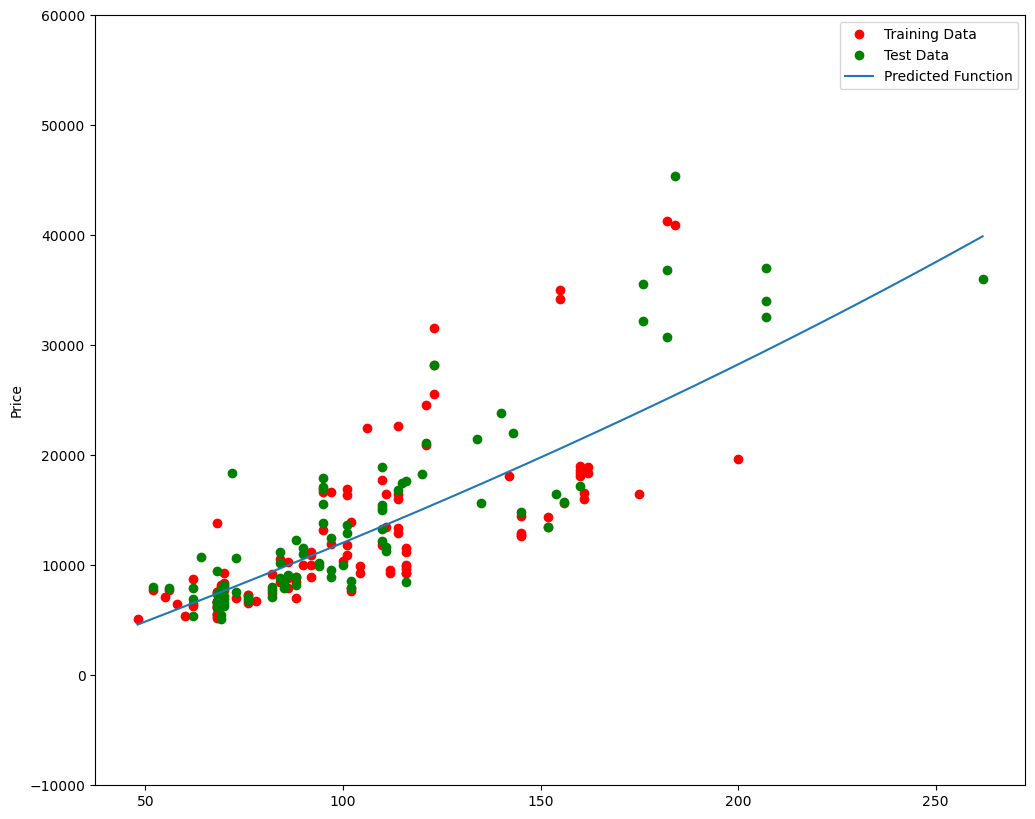

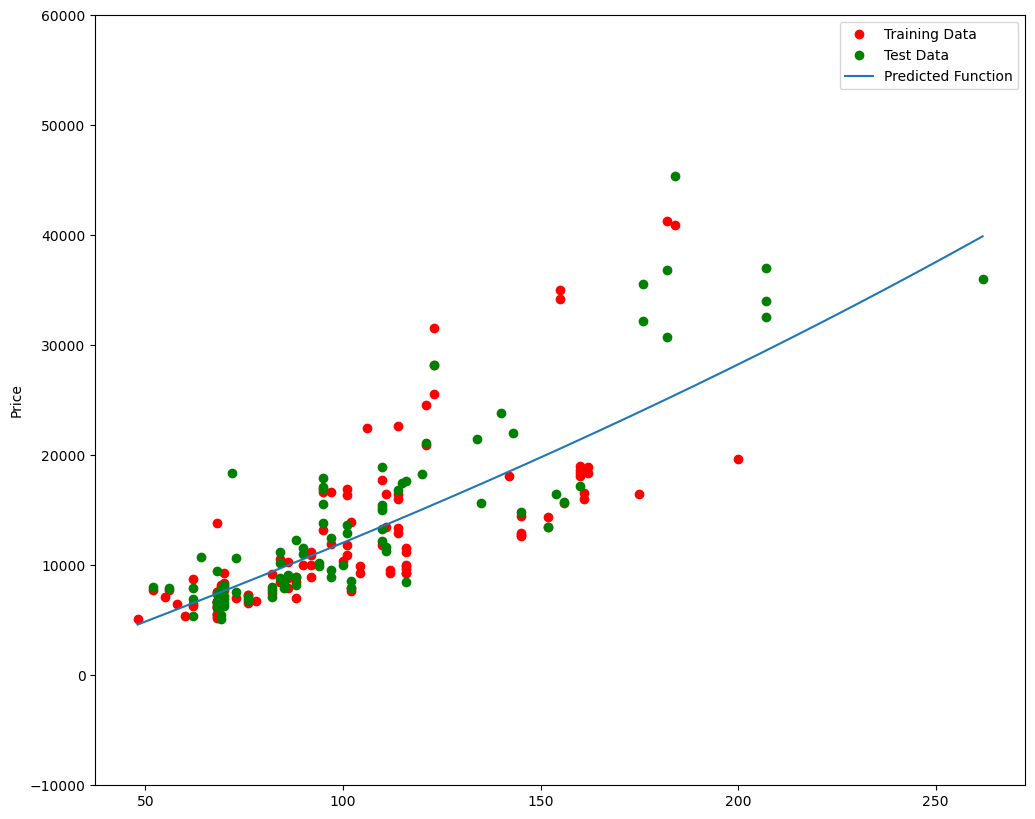

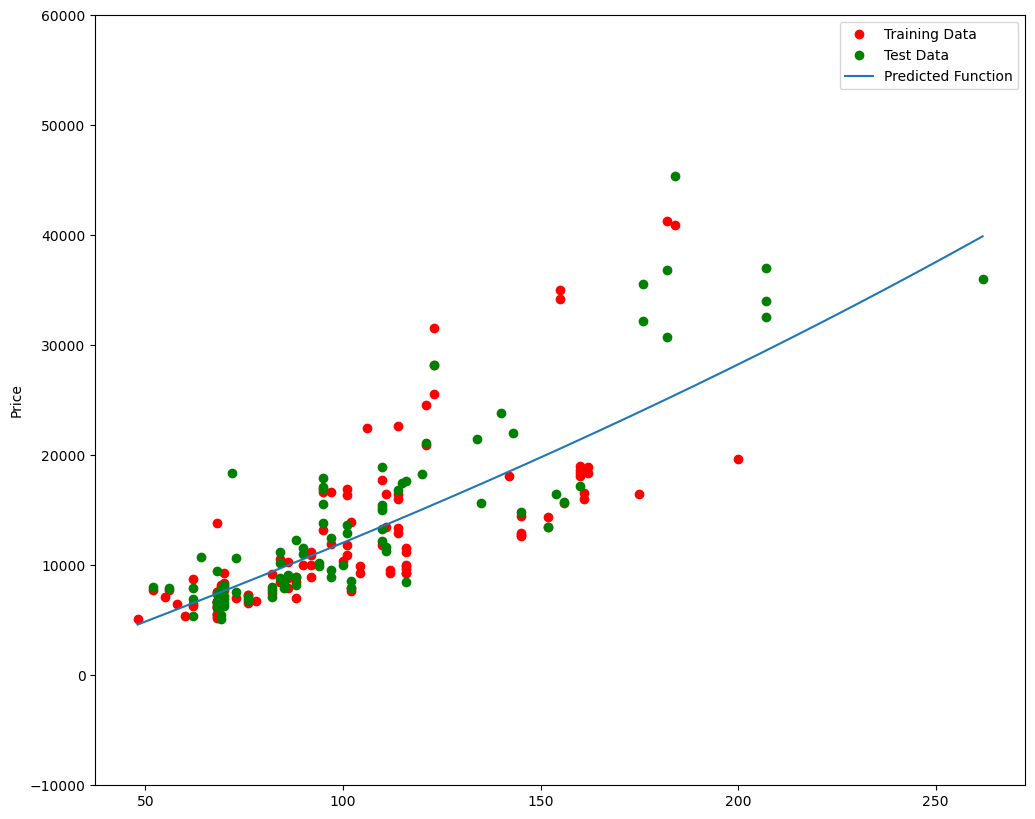

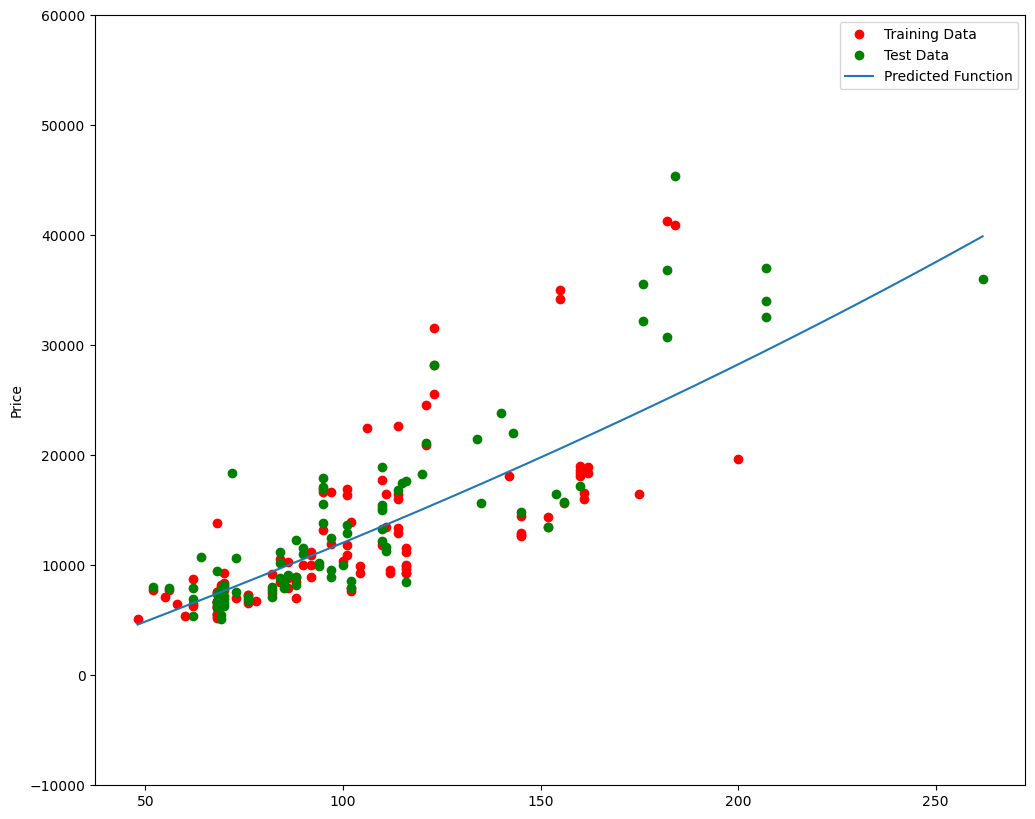

In [99]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<b>Requirement:</b>
<p>Create a "PolynomialFeatures" objest "pr1" of degree two.</p>

In [102]:
pr1=PolynomialFeatures(degree=2)

<b>Requirement:</b>
<p>Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. </p>

In [104]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<b>Requirement:</b>
<p>How many dimensions does the new feature have?</p>

In [108]:
x_train_pr1.shape
#15 features

(110, 15)

<b>Requirement:</b>
<p>Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</p>

In [109]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

<b>Requirement:</b>
<p>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data</p>

In [117]:
yhat1 = poly1.predict(x_test_pr1)
Title = "Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data"

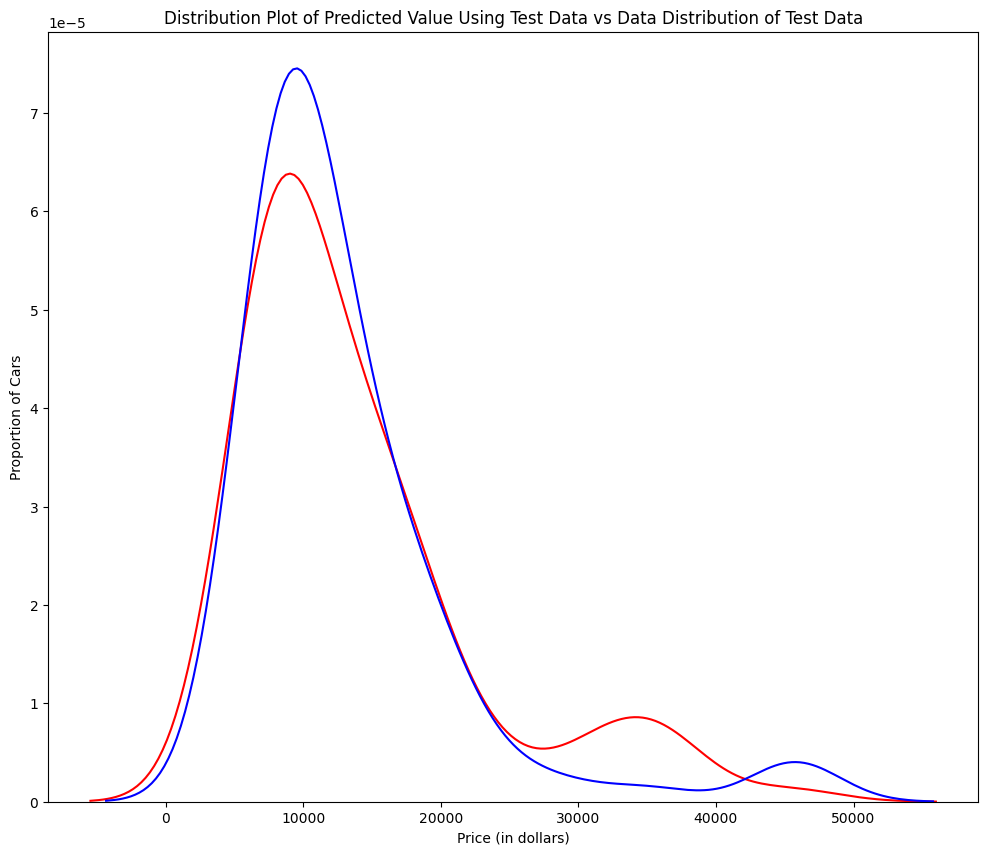

In [118]:
DistributionPlot(y_test, yhat1, "Actual Values(test)","Predicted Values(test)", Title) 

<b>Conclusion:</b>
The predicted value is higher than the actual value for the care wherhe the price of 10,000 USD range, conversely the predicted price is lower than the price cost in the 30,000 USD to 40,000 USD range. Model is not accurate in three ranges

<H2>Part 3: Ridge Regression</H2>

In [120]:
#perform a degree=2 polynomial transformation on data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',\
                                     'normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',\
                                   'normalized-losses','symboling']])

In [121]:
#import Ridge from the module `linear models`
from sklearn.linear_model import Ridge

In [123]:
#create Ridge regression object
#set the regularization parameter alpha=1
RidgeModel=Ridge(alpha=1)

In [125]:
#fit the model using method `fit`
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [126]:
#obtain the prediction
yhat = RidgeModel.predict(x_test_pr)

In [127]:
#compare the first five predicted samples to test set values
print('predcted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predcted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set: [ 6295. 10698. 13860. 13499.]


In [130]:
#select the value of alpha that minimizes the test error. 
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10*np.array(range(0,1000))
pbar = tqdm(Alpha)

#create a progress bar to see how many iterations were completed so far
for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|██████████| 1000/1000 [00:02<00:00, 449.84it/s, Test Score=0.564, Train Score=0.859][A


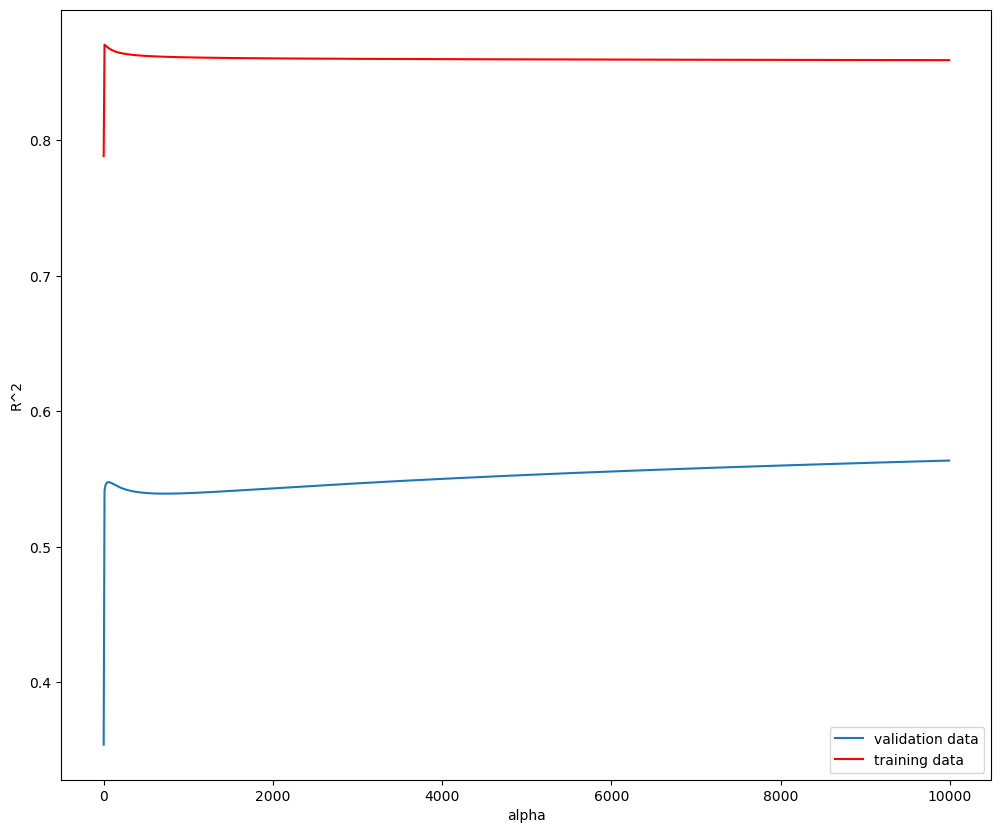

In [131]:
#plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<b>Figure 4:</b>
<p>The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. 
The x-axis represent different values of Alpha.</p>
<p>In this example the model was built and tested on the same data, so the training and the test data are the same.</p>
<p>For red line, which represents the R^2 of the training data, as Alpha increases, the R^2 decreases. This also meand that the model performs worse on the training data as Alpha decreases.</p>
<p>For blue line(R^2 of the training data), as the value for Alpha increases the R^2 increases and converges at a point.</p>

<b>Requirement:</b>
<p>Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.<p>

In [142]:
RidgeModel = Ridge(alpha=10) 
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.5418576440208844

<H3>Part 4: Grid Search</H3>

<p>The term Alpha is a hyperparameter. To make the process of finding the best hyperparameter simplier use sklearn class <b>GridSearchCV</b>.</p>

In [139]:
#import `GridSearchCV` from the module `model_selection`
from sklearn.model_selection import GridSearchCV

In [141]:
#create a dictionaky of parameter values
parameters1=[{'alpha':[0.01, 0.1, 1, 10, 100, 1000]}]
parameters1

[{'alpha': [0.01, 0.1, 1, 10, 100, 1000]}]

In [143]:
#create a ridge regression object
RR=Ridge()
RR

Ridge()

In [144]:
#create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [145]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100, 1000]}])

In [147]:
#obtain the estimator with the pest parameters
#assign to the variable BestRR
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000)

In [148]:
#test model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8441475141924132

<b>Requirement:</b>
<p>Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters.</p>

In [ ]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
RR1=Ridge()
RR1
Grid2 = GridSearchCV(RR1, parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
BestRR1=Grid2.best_estimator_
BestRR1